### 중요  : AND 학습하기 

In [0]:
import tensorflow as tf
import numpy as np #파이썬이 가지고있는 수학 라이브러리
import matplotlib.pyplot as plt

* Hyperparameters

In [0]:
tf.set_random_seed(705)  # for reproducibility
learning_rate = 0.1

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [0],
          [0],
          [1]]

In [0]:
# xor
'''
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]
'''

'\nx_data = [[0, 0],\n          [0, 1],\n          [1, 0],\n          [1, 1]]\n\ny_data = [[0],\n          [1],\n          [1],\n          [0]]\n'

In [0]:
x_data = np.array(x_data)

In [0]:
x_data.shape

(4, 2)

In [0]:
y_data = np.array(y_data)

In [0]:
y_data.shape

(4, 1)

In [0]:
X = tf.placeholder(tf.float32, [None, 2]) # none 나중에 알려줌
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 1]), name='weight1') #랜덤인데 2개값이 들어가서 하나가나옴, weight로 2개와 하나를 이어줌
b1 = tf.Variable(tf.random_normal([1]), name='bias1')      #랜덤인데 1개값이 들어가서 하나가나옴
hypothesis = tf.sigmoid(tf.matmul(X, W1) + b1) # matmul : x1, w1 곱하고 x2, w2를 곱함, w에 근거하여 가설 검증

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y)) # 가설에서 실제값 뺀거의 제곱
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #cost의 정답값, 가설값의 차이를 optimizer에게 최소화하라. train 이라고 명명

In [0]:
# Launch graph
sess = tf.Session() #tf를 실행시키려할때만 sess 열어서 실행

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [0]:
vw = []
for i in range(10001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0: 
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print('step={} / cost={}'.format(i, c1))
        
        vw.append(c1) # 1만번 중에 1천번마다 cost를 0으로 하게끔 에러가 줄어드는 값을 확인

step=0 / cost=0.2666192650794983
step=1000 / cost=0.0570639967918396
step=2000 / cost=0.03168941289186478
step=3000 / cost=0.021187249571084976
step=4000 / cost=0.015636833384633064
step=5000 / cost=0.012272004038095474
step=6000 / cost=0.010040191933512688
step=7000 / cost=0.008463049307465553
step=8000 / cost=0.0072950273752212524
step=9000 / cost=0.006398254074156284
step=10000 / cost=0.00568982120603323


### 결과 확인하기

In [0]:

for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
  
    
    print( i, sess.run(l1))
    #print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

0 [[0.00084831]]
1 [[0.08150733]]
2 [[0.08150719]]
3 [[0.90267736]]


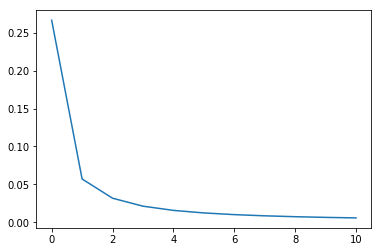

In [0]:
plt.plot(vw)

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

### 참고 : Sigmoid

In [0]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [0]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [0]:
for i in range(len(x1)):
    y1 = x1[i]
    y2 = sess.run(tf.sigmoid(y1))
    print('{} --> {}'.format(y1, y2))

-10.0 --> 4.5397868702434395e-05
-9.5 --> 7.484622751061123e-05
-9.0 --> 0.00012339457598623172
-8.5 --> 0.00020342697805520653
-8.0 --> 0.0003353501304664781
-7.5 --> 0.0005527786369235996
-7.0 --> 0.0009110511944006454
-6.5 --> 0.0015011822567369917
-6.0 --> 0.0024726231566347743
-5.5 --> 0.004070137715896128
-5.0 --> 0.0066928509242848554
-4.5 --> 0.01098694263059318
-4.0 --> 0.01798620996209156
-3.5 --> 0.02931223075135632
-3.0 --> 0.04742587317756678
-2.5 --> 0.07585818002124355
-2.0 --> 0.11920292202211755
-1.5 --> 0.18242552380635635
-1.0 --> 0.2689414213699951
-0.5 --> 0.3775406687981454
0.0 --> 0.5
0.5 --> 0.6224593312018546
1.0 --> 0.7310585786300049
1.5 --> 0.8175744761936437
2.0 --> 0.8807970779778823
2.5 --> 0.9241418199787566
3.0 --> 0.9525741268224334
3.5 --> 0.9706877692486436
4.0 --> 0.9820137900379085
4.5 --> 0.9890130573694068
5.0 --> 0.9933071490757153
5.5 --> 0.995929862284104
6.0 --> 0.9975273768433653
6.5 --> 0.998498817743263
7.0 --> 0.9990889488055994
7.5 --> 0